In [3]:
import pandas as pd
df = pd.read_csv("diamonds.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df_ohe = pd.get_dummies(df)

In [7]:
df_ohe.shape

(53940, 27)

# Apply PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(random_state=7)

In [10]:
pca.fit(df_ohe)

PCA(random_state=7)

In [11]:
trans_data = pca.transform(df_ohe)

In [12]:
type(trans_data)

numpy.ndarray

In [13]:
df_trans = pd.DataFrame(trans_data, index=df_ohe.index)

In [14]:
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-3606.800717,-2.166804,-0.995908,-0.962445,0.099581,-0.023399,0.145777,-0.185704,-0.794908,0.874357,...,-0.187188,0.052929,0.133208,0.146051,-0.017616,0.136521,0.005772,-3.538836e-16,1.084202e-16,3.152860e-16
1,-3606.800342,4.163437,-0.983330,-1.604882,-0.338579,-0.782995,-0.676778,-0.407839,-0.019127,0.654105,...,-0.138193,0.022197,0.060584,0.105913,-0.004379,0.130466,0.056554,-2.428613e-16,1.830133e-16,5.355959e-16
2,-3605.799959,8.717281,-2.668608,-1.662101,0.001042,-0.284928,0.816854,-0.004369,-0.449256,0.673278,...,-0.070987,-0.045690,0.014820,0.104344,0.031482,0.121413,0.094998,3.677614e-16,8.838416e-16,4.852889e-16
3,-3598.800319,0.616735,0.753173,-1.013003,0.531751,0.397252,-0.822494,-0.426778,0.287813,-0.092700,...,-0.045043,0.102959,0.106516,0.064605,0.016621,0.083170,-0.012277,-4.857226e-17,-1.283695e-16,3.348016e-16
4,-3597.800238,0.348418,1.722251,-0.660394,0.153750,0.080850,0.064526,0.142457,-0.626855,0.145228,...,-1.154296,0.197720,0.242720,0.104561,0.032781,0.117992,-0.162057,-7.424616e-16,7.329207e-16,-7.372575e-18


In [15]:
pca.components_[0] # coefficients of every column

array([ 1.09500242e-04, -3.82352319e-06,  7.12078939e-05,  9.99999918e-01,
        2.48687705e-04,  2.47760901e-04,  1.52347888e-04,  7.98852016e-07,
       -2.24883229e-08, -1.19308135e-05,  1.04653924e-05,  6.89057387e-07,
       -6.02031566e-06, -9.76931544e-06, -2.31097413e-06,  8.72554775e-07,
        5.35757290e-06,  7.32056240e-06,  4.54991515e-06, -7.44934742e-09,
       -2.22680238e-06,  9.61856434e-07,  1.21044278e-05, -8.88457918e-07,
       -1.11523130e-07, -6.00181818e-06, -3.83023332e-06])

# How many components to select?

In [16]:
pca.explained_variance_ratio_ * 100

array([9.99999366e+01, 3.33397457e-05, 1.14207242e-05, 4.49202656e-06,
       1.52189557e-06, 1.42547593e-06, 1.41716416e-06, 1.30462589e-06,
       1.17579101e-06, 1.12264086e-06, 9.89530474e-07, 9.30251380e-07,
       8.34218350e-07, 6.52582931e-07, 6.09599440e-07, 5.69021756e-07,
       4.27074295e-07, 3.39398140e-07, 2.38057326e-07, 2.25200645e-07,
       1.87832912e-07, 1.01189350e-07, 8.03933255e-08, 2.74859634e-08,
       8.47972880e-31, 8.47972880e-31, 8.47972880e-31])

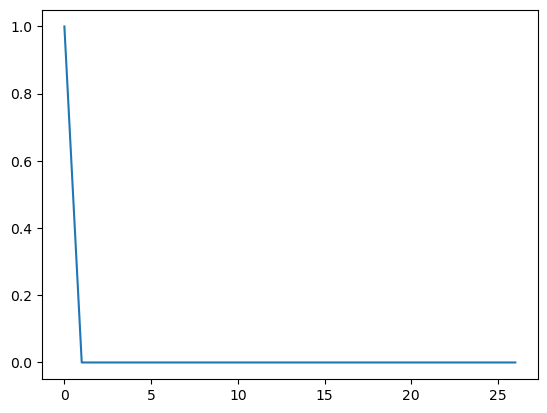

In [17]:
import matplotlib.pyplot as plt
plt.plot(list(range(df_ohe.shape[1])), pca.explained_variance_ratio_)

# Automated way of selecting number of components

In [18]:
pca1 = PCA(n_components = 0.95, random_state=7 )

In [19]:
pca1.fit(df_ohe)

PCA(n_components=0.95, random_state=7)

In [20]:
trans_data = pca1.transform(df_ohe)

In [21]:
trans_data.shape

(53940, 1)